In [1]:

# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from scipy import stats
import os
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression


In [2]:
X = pd.read_csv('fixme/train.csv')
# Loading in training set

In [3]:
pd.set_option('display.max_columns',100)

In [4]:
X.head()
# checking head just bc its protocol

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
X_train, X_test  = train_test_split(X, test_size=0.3, random_state=42)


In [6]:
X_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
X_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
X_train.info()
# checking column names, data types and which ones have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 226 to 860
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1435 non-null   int64  
 1   PID              1435 non-null   int64  
 2   MS SubClass      1435 non-null   int64  
 3   MS Zoning        1435 non-null   object 
 4   Lot Frontage     1198 non-null   float64
 5   Lot Area         1435 non-null   int64  
 6   Street           1435 non-null   object 
 7   Alley            100 non-null    object 
 8   Lot Shape        1435 non-null   object 
 9   Land Contour     1435 non-null   object 
 10  Utilities        1435 non-null   object 
 11  Lot Config       1435 non-null   object 
 12  Land Slope       1435 non-null   object 
 13  Neighborhood     1435 non-null   object 
 14  Condition 1      1435 non-null   object 
 15  Condition 2      1435 non-null   object 
 16  Bldg Type        1435 non-null   object 
 17  House Style  

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 1124 to 309
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               616 non-null    int64  
 1   PID              616 non-null    int64  
 2   MS SubClass      616 non-null    int64  
 3   MS Zoning        616 non-null    object 
 4   Lot Frontage     523 non-null    float64
 5   Lot Area         616 non-null    int64  
 6   Street           616 non-null    object 
 7   Alley            40 non-null     object 
 8   Lot Shape        616 non-null    object 
 9   Land Contour     616 non-null    object 
 10  Utilities        616 non-null    object 
 11  Lot Config       616 non-null    object 
 12  Land Slope       616 non-null    object 
 13  Neighborhood     616 non-null    object 
 14  Condition 1      616 non-null    object 
 15  Condition 2      616 non-null    object 
 16  Bldg Type        616 non-null    object 
 17  House Style  

In [10]:
X_train.shape
# checking shape of original dataframe

(1435, 81)

In [11]:
X_test.shape

(616, 81)

In [12]:
X_train.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    237
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [13]:
X_test.isna().sum()

Id               0
PID              0
MS SubClass      0
MS Zoning        0
Lot Frontage    93
                ..
Misc Val         0
Mo Sold          0
Yr Sold          0
Sale Type        0
SalePrice        0
Length: 81, dtype: int64

In [14]:
nominal = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood','Condition 1','Condition 2', 'Bldg Type', 'House Style', 'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type'] 

In [15]:
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC', 'Electrical', 'Kitchen Qual','Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

In [16]:
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']


In [17]:
discrete = ['Year Built','Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold'] 

In [18]:
tot = (nominal + ordinal + continuous + discrete)

In [19]:
wholecolumns = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'SalePrice']

In [20]:
def whatmissingtho():
    for i in tot:
        for j in wholecolumns:
            if i == j:
                return True
            False
# Checked the description page on the Kaggle site to organize the columns into lists of nominal/ordinal/continuous/discrete  values
# sum'd the lists and checked to see if they were all included in the original datasets columns
# Sale Condition (nominal) is not in dataset

In [21]:
whatmissingtho()

True

In [22]:
X_train[nominal].head()

,Id,PID,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type
226,973,923203190,120,RM,Pave,NaN,Lvl,FR2,Mitchel,Norm,Norm,TwnhsE,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NaN,WD
1742,482,528250040,60,RL,Pave,NaN,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,NaN,WD
1516,791,905451340,20,RL,Pave,NaN,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,BrkComm,Brk Cmn,None,CBlock,GasA,Y,Attchd,NaN,COD
1568,2233,910200110,50,RM,Pave,NaN,Lvl,Corner,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,GasA,Y,Detchd,NaN,WD
862,1793,528445070,60,RL,Pave,NaN,Lvl,Inside,Somerst,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NaN,WD


In [23]:
X_train[nominal].isna().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Street             0
Alley           1335
Land Contour       0
Lot Config         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      18
Foundation         0
Heating            0
Central Air        0
Garage Type       78
Misc Feature    1383
Sale Type          0
dtype: int64

In [24]:
X_train[nominal]['Alley'].value_counts()


Grvl    60
Pave    40
Name: Alley, dtype: int64

In [25]:
# imputing ['Alley'] column to whether or not an alley is present by using a map function

In [26]:
X_train['Alley']=X_train['Alley'].map({'Grvl': 1, 'Pave':1, np.nan:0})

In [27]:
X_train['Alley'].value_counts()

0    1335
1     100
Name: Alley, dtype: int64

In [28]:
X_test['Alley']=X_test['Alley'].map({'Grvl': 1, 'Pave':1, np.nan:0})

In [29]:
X_test['Alley'].value_counts()

0    576
1     40
Name: Alley, dtype: int64

In [30]:
X_train['Garage Type'].value_counts()

Attchd     866
Detchd     362
BuiltIn     89
Basment     18
2Types      15
CarPort      7
Name: Garage Type, dtype: int64

In [31]:
X_train['Garage Type'] = X_train['Garage Type'].replace(np.nan,X_train['Garage Type'].mode()[0])
#  replaced null values with mode of column

In [32]:
X_test['Garage Type'] = X_test['Garage Type'].replace(np.nan,X_test['Garage Type'].mode()[0])


In [33]:
X_train['Mas Vnr Type']= X_train['Mas Vnr Type'].replace(np.nan,X_train['Mas Vnr Type'].mode()[0])


In [34]:
X_test['Mas Vnr Type']= X_test['Mas Vnr Type'].replace(np.nan,X_test['Mas Vnr Type'].mode()[0])


In [35]:
X_train[nominal].isna().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Street             0
Alley              0
Land Contour       0
Lot Config         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Foundation         0
Heating            0
Central Air        0
Garage Type        0
Misc Feature    1383
Sale Type          0
dtype: int64

In [36]:
X_test[nominal].isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Street            0
Alley             0
Land Contour      0
Lot Config        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Foundation        0
Heating           0
Central Air       0
Garage Type       0
Misc Feature    603
Sale Type         0
dtype: int64

In [37]:
X_train[ordinal].isna().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual           40
Bsmt Cond           40
Bsmt Exposure       42
BsmtFin Type 1      40
BsmtFin Type 2      41
Heating QC           0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu       716
Garage Finish       78
Garage Qual         78
Garage Cond         78
Paved Drive          0
Pool QC           1428
Fence             1143
dtype: int64

In [38]:
X_test[ordinal].isna().sum()

Lot Shape           0
Utilities           0
Land Slope          0
Overall Qual        0
Overall Cond        0
Exter Qual          0
Exter Cond          0
Bsmt Qual          15
Bsmt Cond          15
Bsmt Exposure      16
BsmtFin Type 1     15
BsmtFin Type 2     15
Heating QC          0
Electrical          0
Kitchen Qual        0
Functional          0
Fireplace Qu      284
Garage Finish      36
Garage Qual        36
Garage Cond        36
Paved Drive         0
Pool QC           614
Fence             508
dtype: int64

In [39]:
X_train[ordinal]['Bsmt Qual'].replace(np.nan,X_train[ordinal]['Bsmt Qual'].mode()[0])

226     Ex
1742    Gd
1516    TA
1568    TA
862     Gd
        ..
1724    Ex
1095    Gd
1130    TA
1294    TA
860     Gd
Name: Bsmt Qual, Length: 1435, dtype: object

In [40]:
X_test[ordinal]['Bsmt Qual'].replace(np.nan,X_test[ordinal]['Bsmt Qual'].mode()[0])

1124    TA
188     TA
1727    Gd
1658    Gd
1424    Gd
        ..
1864    Gd
405     Gd
1391    TA
1368    Gd
309     Gd
Name: Bsmt Qual, Length: 616, dtype: object

In [41]:
X_train[ordinal]= X_train[ordinal].replace(np.nan,'NA')
# in this column, the null values are for the places with no basement, so I will be replacing them 

In [42]:
X_test[ordinal]= X_test[ordinal].replace(np.nan,'NA')

In [43]:
X_train[ordinal].isna().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Overall Qual      0
Overall Cond      0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
dtype: int64

In [44]:
X_test[ordinal].isna().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Overall Qual      0
Overall Cond      0
Exter Qual        0
Exter Cond        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
dtype: int64

In [45]:
X_train[continuous].isna().sum()

Lot Frontage      237
Lot Area            0
Mas Vnr Area       18
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
1st Flr SF          0
2nd Flr SF          0
Gr Liv Area         0
Garage Area         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
SalePrice           0
dtype: int64

In [46]:
X_test[continuous].isna().sum()

Lot Frontage      93
Lot Area           0
Mas Vnr Area       4
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Gr Liv Area        0
Garage Area        1
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [47]:
imputer = KNNImputer(n_neighbors=5)
cont_transformed = pd.DataFrame(imputer.fit_transform(X_train[continuous]),columns=continuous)
cont_transformed.set_index(X_train.index,inplace=True)

In [48]:
impruter = KNNImputer(n_neighbors=5)
contt_transformed = pd.DataFrame(impruter.fit_transform(X_test[continuous]),columns=continuous)
contt_transformed.set_index(X_test.index,inplace=True)

In [49]:
X_train[continuous]=cont_transformed

In [50]:
X_test[continuous]=contt_transformed

In [51]:
X_train[continuous].isna().sum()

Lot Frontage      0
Lot Area          0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0
Pool Area         0
Misc Val          0
SalePrice         0
dtype: int64

In [52]:
X_test[continuous].isna().sum()

Lot Frontage      0
Lot Area          0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
Enclosed Porch    0
3Ssn Porch        0
Screen Porch      0
Pool Area         0
Misc Val          0
SalePrice         0
dtype: int64

In [53]:
X_train[discrete].isna().sum()

Year Built         0
Year Remod/Add     0
Bsmt Full Bath     2
Bsmt Half Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt     78
Garage Cars        0
Mo Sold            0
Yr Sold            0
dtype: int64

In [54]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent', copy=False)
ont_transformed=pd.DataFrame(imp_mode.fit_transform(X_train[discrete]), columns=discrete)
ont_transformed.set_index(X_train.index,inplace=True)

In [55]:
impa_mode = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent', copy=False)
ontt_transformed=pd.DataFrame(impa_mode.fit_transform(X_test[discrete]), columns=discrete)
ontt_transformed.set_index(X_test.index,inplace=True)

In [56]:
# imp_mode=SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
# X_train[discrete] = pd.DataFrame(imp_mode.fit_transform(X_train[discrete]),columns=X_train[discrete].columns)

In [57]:
# pimp_mode=SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
# X_test[discrete] = pd.DataFrame(pimp_mode.fit_transform(X_test[discrete]),columns=X_test[discrete].columns)

In [58]:
X_train[discrete]=ont_transformed

In [59]:
X_test[discrete]=ontt_transformed

In [60]:
X_train[discrete].isna().sum()

Year Built        0
Year Remod/Add    0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Mo Sold           0
Yr Sold           0
dtype: int64

In [61]:
X_test[discrete].isna().sum()

Year Built        0
Year Remod/Add    0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Mo Sold           0
Yr Sold           0
dtype: int64

In [62]:
X_train = X_train.drop(['Misc Feature', 'Pool QC'], axis = 1)
# dropped Misc Features as it does not provide much discernable information
# dropping Pool QC as there are only a few rows with values

In [63]:
X_test = X_test.drop(['Misc Feature', 'Pool QC'], axis = 1)


In [64]:
X_train.isna().sum().sum()

0

In [65]:
X_test.isna().sum().sum()

0

In [66]:
X_train[continuous+discrete].columns

Index(['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice', 'Year Built', 'Year Remod/Add',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold'],
      dtype='object')

<AxesSubplot:>

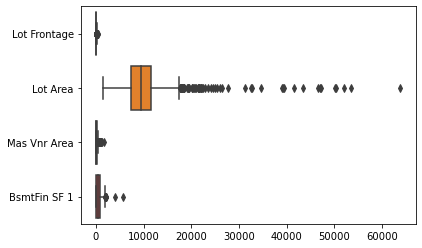

In [67]:
sns.boxplot(data=X_train[continuous[:4]], orient = 'h')

<AxesSubplot:>

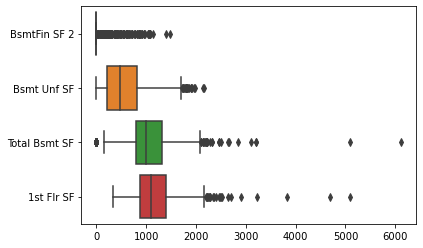

In [68]:
sns.boxplot(data=X_train[continuous[4:8]], orient = 'h')

<AxesSubplot:>

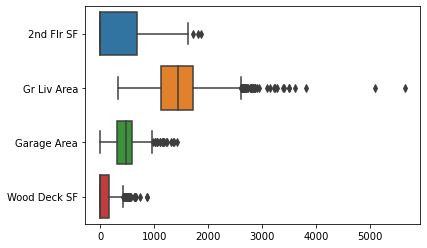

In [69]:
sns.boxplot(data=X_train[continuous[8:12]], orient = 'h')

<AxesSubplot:>

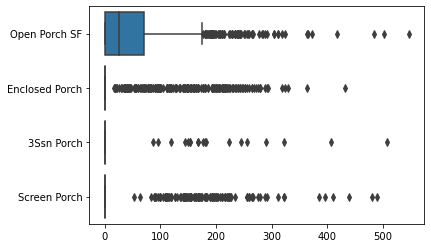

In [70]:
sns.boxplot(data=X_train[continuous[12:16]], orient = 'h')

<AxesSubplot:>

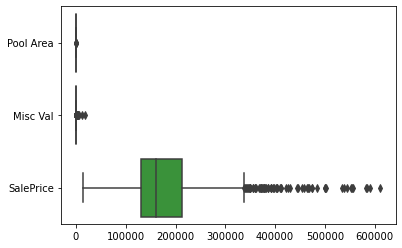

In [71]:
sns.boxplot(data=X_train[continuous[16:19]], orient = 'h')

In [72]:
len(X_train[discrete].columns)

14

In [73]:
len(X_train[continuous].columns)

19

<AxesSubplot:>

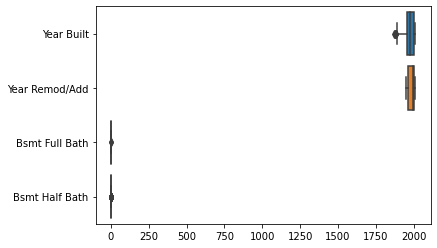

In [74]:
sns.boxplot(data=X_train[discrete[0:4]], orient = 'h')

<AxesSubplot:>

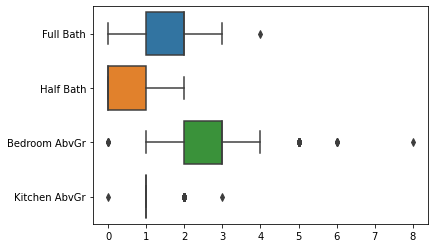

In [75]:
sns.boxplot(data=X_train[discrete[4:8]], orient = 'h')

<AxesSubplot:>

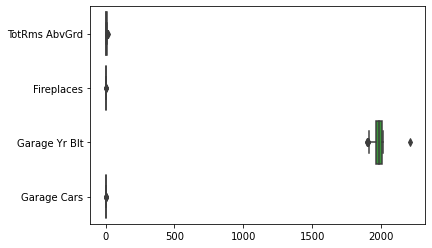

In [76]:
sns.boxplot(data=X_train[discrete[8:12]], orient = 'h')

<AxesSubplot:>

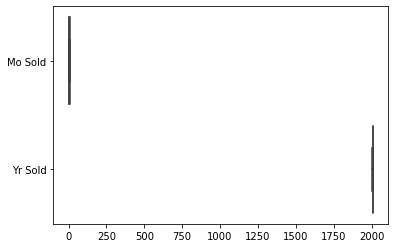

In [77]:
sns.boxplot(data=X_train[discrete[12:16]], orient = 'h')

<AxesSubplot:>

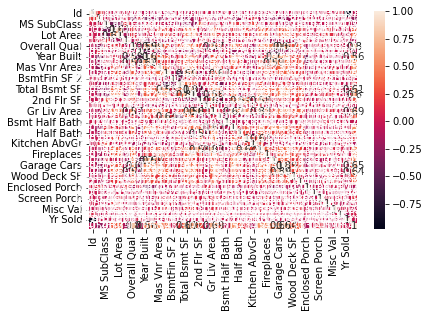

In [78]:
sns.heatmap(X_train.corr(), annot = True)

In [79]:
X_train[continuous].describe()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,70.100627,9910.213240,99.988711,442.821185,49.402787,564.800279,1057.024251,1161.639721,327.009756,1493.616725,473.314286,94.294077,47.785366,21.704530,2.806969,16.863415,2.754007,59.075958,180717.969338
std,23.090639,5388.301089,176.646375,473.304557,171.639163,441.279384,458.916338,405.571607,426.014804,509.845159,217.657183,125.629799,67.425696,59.670683,27.060492,58.112424,40.315200,634.045814,80067.840392
min,21.000000,1476.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13100.000000
25%,60.000000,7424.500000,0.000000,0.000000,0.000000,218.000000,792.500000,874.000000,0.000000,1125.000000,312.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129650.000000
50%,70.000000,9399.000000,0.000000,360.000000,0.000000,466.000000,994.000000,1094.000000,0.000000,1432.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161500.000000
75%,80.000000,11450.500000,160.500000,735.000000,0.000000,810.000000,1312.000000,1392.000000,685.000000,1718.500000,577.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,213000.000000
max,313.000000,63887.000000,1600.000000,5644.000000,1474.000000,2153.000000,6110.000000,5095.000000,1862.000000,5642.000000,1418.000000,870.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,611657.000000


In [80]:
X_train[continuous+discrete].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 226 to 860
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    1435 non-null   float64
 1   Lot Area        1435 non-null   float64
 2   Mas Vnr Area    1435 non-null   float64
 3   BsmtFin SF 1    1435 non-null   float64
 4   BsmtFin SF 2    1435 non-null   float64
 5   Bsmt Unf SF     1435 non-null   float64
 6   Total Bsmt SF   1435 non-null   float64
 7   1st Flr SF      1435 non-null   float64
 8   2nd Flr SF      1435 non-null   float64
 9   Gr Liv Area     1435 non-null   float64
 10  Garage Area     1435 non-null   float64
 11  Wood Deck SF    1435 non-null   float64
 12  Open Porch SF   1435 non-null   float64
 13  Enclosed Porch  1435 non-null   float64
 14  3Ssn Porch      1435 non-null   float64
 15  Screen Porch    1435 non-null   float64
 16  Pool Area       1435 non-null   float64
 17  Misc Val        1435 non-null   

In [81]:
X_train = X_train[(np.abs(stats.zscore(X_train[continuous+discrete])) < 3).all(axis=1)]


In [82]:
X_test = X_test[(np.abs(stats.zscore(X_test[continuous+discrete])) < 3).all(axis=1)]


In [83]:
X_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1742,482,528250040,60,RL,66.8,8174.0,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,494.0,Unf,0.0,204.0,698.0,GasA,Ex,Y,SBrkr,698.0,644.0,0,1342.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,TA,Attchd,2003.0,Fin,2.0,393.0,TA,TA,Y,100.0,56.0,0.0,0.0,0.0,0.0,NA,0.0,5.0,2009.0,WD,178000.0
1516,791,905451340,20,RL,68.0,9571.0,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,3,1958.0,1958.0,Gable,CompShg,BrkComm,Brk Cmn,None,0.0,TA,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1276.0,1276.0,GasA,TA,Y,FuseA,1276.0,0.0,0,1276.0,0.0,0.0,1.0,0.0,3.0,1.0,TA,5.0,Mod,0.0,NA,Attchd,1958.0,Unf,1.0,350.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NA,0.0,6.0,2009.0,COD,60000.0
1568,2233,910200110,50,RM,50.0,7000.0,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,7,1940.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,375.0,Unf,0.0,345.0,720.0,GasA,Gd,Y,FuseA,720.0,495.0,0,1215.0,0.0,0.0,1.0,0.0,3.0,1.0,Gd,6.0,Typ,0.0,NA,Detchd,1965.0,Fin,2.0,720.0,TA,TA,Y,0.0,0.0,30.0,0.0,0.0,0.0,MnPrv,0.0,5.0,2007.0,WD,141000.0
862,1793,528445070,60,RL,75.0,8778.0,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006.0,2006.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1302.0,1302.0,GasA,Ex,Y,SBrkr,1302.0,528.0,0,1830.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,NA,BuiltIn,2006.0,RFn,3.0,859.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,NA,0.0,3.0,2007.0,WD,221300.0
148,2132,907192040,60,RL,77.8,8826.0,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No,GLQ,841.0,Unf,0.0,144.0,985.0,GasA,Ex,Y,SBrkr,985.0,857.0,0,1842.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,TA,Attchd,2000.0,Fin,2.0,486.0,TA,TA,Y,193.0,96.0,0.0,0.0,0.0,0.0,NA,0.0,7.0,2007.0,WD,217500.0


In [84]:
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC', 'Electrical', 'Kitchen Qual','Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Fence']

In [85]:
X_train = X_train.replace({'Lot Shape': {'Reg': 3,'IR1': 2, 'IR2': 1, 'IR3': 2}, 'Utilities': {'AllPub': 1, 'NoSewr': 0},
           'Land Slope': {'Gtl':0,'Mod':1,'Sev':2}, 'Exter Qual': {'Ex':3, 'Gd':2, 'TA':1,'Fa':0}, 'Exter Cond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
            'Bsmt Qual': {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, 'Bsmt Cond': {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, 
            'Bsmt Exposure': {'Gd':4,'Av':3,'Mn':2,'No':1, 'NA':0}, 'BsmtFin Type 1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
            'BsmtFin Type 2': {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}, 'Heating QC': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}, 
            'Electrical': {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1, 'NA':0}, 'Kitchen Qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
            'Functional' : {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}, 'Fireplace Qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0},
            'Garage Finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0}, 'Garage Qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
            'Garage Cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}, 'Paved Drive': {'Y':3,'P':2,'N':1},
            'Fence': {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0} })
# Dictionary bits borrowed From Mr Frank Novak!!


In [86]:
X_test = X_test.replace({'Lot Shape': {'Reg': 3,'IR1': 2, 'IR2': 1, 'IR3': 2}, 'Utilities': {'AllPub': 1, 'NoSewr': 0},
           'Land Slope': {'Gtl':0,'Mod':1,'Sev':2}, 'Exter Qual': {'Ex':3, 'Gd':2, 'TA':1,'Fa':0}, 'Exter Cond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
            'Bsmt Qual': {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, 'Bsmt Cond': {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, 
            'Bsmt Exposure': {'Gd':4,'Av':3,'Mn':2,'No':1, 'NA':0}, 'BsmtFin Type 1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
            'BsmtFin Type 2': {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}, 'Heating QC': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}, 
            'Electrical': {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1,'NA':0}, 'Kitchen Qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
            'Functional' : {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}, 'Fireplace Qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0},
            'Garage Finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0}, 'Garage Qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
            'Garage Cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}, 'Paved Drive': {'Y':3,'P':2,'N':1},
            'Fence': {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0} })
# Dictionary bits borrowed From Mr Frank Novak!!


In [87]:
nominal = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood','Condition 1','Condition 2', 'Bldg Type', 'House Style', 'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Sale Type'] 

In [88]:
def convert_to_snake_case(df):
    #add a space between any lowercase-capital letter pair, then replace spaces with _, the all to lowercase
    new_cols = {col: re.sub(r"([a-z]{1})([A-Z]{1})", r"\1 \2", col).replace(" ", "_").lower() for col in df.columns}
    return df.rename(columns = new_cols, inplace = True)
# from B~


In [89]:
convert_to_snake_case(X_train)

In [90]:
convert_to_snake_case(X_test)

In [91]:
ordinal = ['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmt_fin_type_1','bsmt_fin_type_2','heating_qc', 'electrical', 'kitchen_qual','functional', 'fireplace_qu', 'garage_finish', 'garage_qual','garage_cond', 'paved_drive', 'fence']

In [92]:
nominal = ['ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood','condition_1','condition_2', 'bldg_type', 'house_style', 'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation', 'heating', 'central_air', 'garage_type', 'sale_type'] 

In [93]:
X_train[ordinal].dtypes

lot_shape          int64
utilities          int64
land_slope         int64
overall_qual       int64
overall_cond       int64
exter_qual         int64
exter_cond         int64
bsmt_qual          int64
bsmt_cond          int64
bsmt_exposure      int64
bsmt_fin_type_1    int64
bsmt_fin_type_2    int64
heating_qc         int64
electrical         int64
kitchen_qual       int64
functional         int64
fireplace_qu       int64
garage_finish      int64
garage_qual        int64
garage_cond        int64
paved_drive        int64
fence              int64
dtype: object

In [94]:
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area','bsmt_fin_sf_1', 'bsmt_fin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch','3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'sale_price']  
discrete = ['year_built','year_remod/add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath','half_bath','bedroom_abv_gr','kitchen_abv_gr','tot_rms_abv_grd','fireplaces','garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold'] 

In [95]:
numerical = continuous + discrete

In [96]:
X_train[numerical].columns.shape

(33,)

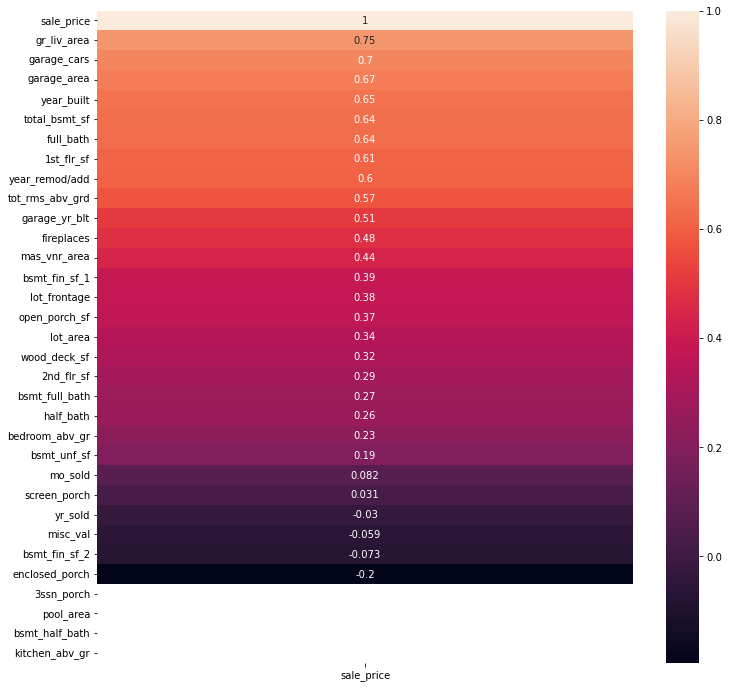

In [97]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train[numerical].corr()[['sale_price']].sort_values('sale_price',ascending=False), annot=True);

In [98]:
X_train.shape

(1050, 79)

In [99]:
X_train = pd.get_dummies(X_train, prefix=nominal, drop_first=True)

In [100]:
X_test = pd.get_dummies(X_test, prefix=nominal, drop_first=True)

In [101]:
X_test.columns

Index(['id', 'pid', 'ms_sub_class', 'lot_frontage', 'lot_area', 'alley',
       'lot_shape', 'utilities', 'land_slope', 'overall_qual',
       ...
       'garage_type_CarPort', 'garage_type_Detchd', 'sale_type_CWD',
       'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI',
       'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=167)

In [102]:
X_train.shape

(1050, 177)

In [103]:
X_test.shape

(424, 167)

In [104]:
set(X_train)-set(X_test)

{'condition_1_RRNe',
 'condition_1_RRNn',
 'condition_2_PosA',
 'condition_2_RRNn',
 'exterior_1st_BrkComm',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_CBlock',
 'ms_zoning_C (all)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'neighborhood_NPkVill',
 'roof_style_Shed'}

In [105]:
set(X_test)-set(X_train)

{'condition_2_PosN',
 'exterior_2nd_Stone',
 'house_style_2.5Fin',
 'ms_zoning_I (all)'}

In [106]:
X_train = X_train.drop(['condition_1_RRNe',
 'condition_1_RRNn',
 'condition_2_PosA',
 'condition_2_RRNn',
 'exterior_1st_BrkComm',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_CBlock',
 'ms_zoning_C (all)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'neighborhood_NPkVill',
 'roof_style_Shed'], axis=1)

In [107]:
set(X_train)-set(X_test)

set()

In [108]:
X_test = X_test.drop(['condition_2_PosN',
 'exterior_2nd_Stone',
 'house_style_2.5Fin',
 'ms_zoning_I (all)'], axis=1)


In [109]:
# X_train=X_train.drop(columns='sale_price')
# y_train = X_train['sale_price']

# X_test=X_test.drop(columns='sale_price')
# y_test = X_test['sale_price']


In [110]:
X_train['sale_price'].head()

1742    178000.0
1516     60000.0
1568    141000.0
862     221300.0
148     217500.0
Name: sale_price, dtype: float64

In [111]:
y_train=X_train['sale_price']
X_train=X_train.drop(columns = 'sale_price')


In [112]:
y_test=X_test['sale_price']
X_test=X_test.drop(columns = 'sale_price')


In [113]:
if isinstance(X_train, pd.DataFrame):
    print('Yea')


Yea


In [114]:
ss = StandardScaler()

In [115]:
ss.fit(X_train)

StandardScaler()

In [116]:
Z_train = ss.transform(X_train)

In [117]:
Z_test = ss.transform(X_test)

In [118]:
Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)

In [119]:
#export datasets
# Z_train.to_csv('cleaned_datasets/Z_train.csv', index = False)


In [120]:
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)
# Z_test.to_csv('cleaned_datasets/Z_test.csv', index = False)


In [121]:
# y_train.to_csv('cleaned_datasets/y_train.csv', index = False)


In [122]:
# y_test.to_csv('cleaned_datasets/y_test.csv', index = False)

In [123]:
Z_train.shape

(1050, 162)

In [124]:
Z_test.shape

(424, 162)

In [125]:
y_test.shape

(424,)

In [126]:
y_train.shape

(1050,)

In [127]:
test = pd.read_csv('fixme/test.csv')

In [128]:
pd.set_option('display.max_columns',100)

In [129]:
nominal = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood','Condition 1','Condition 2', 'Bldg Type', 'House Style', 'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type'] 
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC', 'Electrical', 'Kitchen Qual','Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
continuous = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']
discrete = ['Year Built','Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold'] 

In [130]:
test['Alley']=test['Alley'].map({'Grvl': 1, 'Pave':1, np.nan:0})

In [131]:
test['Garage Type'] = test['Garage Type'].replace(np.nan,test['Garage Type'].mode()[0])


In [132]:
test['Mas Vnr Type']= test['Mas Vnr Type'].replace(np.nan,test['Mas Vnr Type'].mode()[0])


In [133]:
test[ordinal]['Bsmt Qual'].replace(np.nan,test[ordinal]['Bsmt Qual'].mode()[0])

0      Fa
1      Gd
2      Gd
3      TA
4      Gd
       ..
873    TA
874    TA
875    TA
876    TA
877    TA
Name: Bsmt Qual, Length: 878, dtype: object

In [134]:
test[ordinal]= test[ordinal].replace(np.nan,'NA')


In [135]:
imputer = KNNImputer(n_neighbors=5)
cont_transformed = pd.DataFrame(imputer.fit_transform(test[continuous]),columns=continuous)
cont_transformed.set_index(test.index,inplace=True)

In [136]:
test[continuous]=cont_transformed

In [137]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent', copy=False)
ont_transformed=pd.DataFrame(imp_mode.fit_transform(test[discrete]), columns=discrete)
ont_transformed.set_index(test.index,inplace=True)

In [138]:
test[discrete]=ont_transformed

In [139]:
test = test.drop(['Misc Feature', 'Pool QC'], axis = 1)


In [140]:
# test = test[(np.abs(stats.zscore(test[continuous+discrete])) < 3).all(axis=1)]


In [141]:
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC', 'Electrical', 'Kitchen Qual','Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Fence']

In [142]:
test = test.replace({'Lot Shape': {'Reg': 3,'IR1': 2, 'IR2': 1, 'IR3': 2}, 'Utilities': {'AllPub': 1, 'NoSewr': 0},
           'Land Slope': {'Gtl':0,'Mod':1,'Sev':2}, 'Exter Qual': {'Ex':3, 'Gd':2, 'TA':1,'Fa':0}, 'Exter Cond':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
            'Bsmt Qual': {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, 'Bsmt Cond': {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, 
            'Bsmt Exposure': {'Gd':4,'Av':3,'Mn':2,'No':1, 'NA':0}, 'BsmtFin Type 1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0},
            'BsmtFin Type 2': {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}, 'Heating QC': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}, 
            'Electrical': {'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1, 'NA':0}, 'Kitchen Qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
            'Functional' : {'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}, 'Fireplace Qu': {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0},
            'Garage Finish':{'Fin':3,'RFn':2,'Unf':1,'NA':0}, 'Garage Qual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0},
            'Garage Cond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}, 'Paved Drive': {'Y':3,'P':2,'N':1},
            'Fence': {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0} })

In [143]:
nominal = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood','Condition 1','Condition 2', 'Bldg Type', 'House Style', 'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Sale Type'] 

In [144]:
def convert_to_snake_case(df):
    #add a space between any lowercase-capital letter pair, then replace spaces with _, the all to lowercase
    new_cols = {col: re.sub(r"([a-z]{1})([A-Z]{1})", r"\1 \2", col).replace(" ", "_").lower() for col in df.columns}
    return df.rename(columns = new_cols, inplace = True)
# from B~


In [145]:
convert_to_snake_case(test)

In [146]:
ordinal = ['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmt_fin_type_1','bsmt_fin_type_2','heating_qc', 'electrical', 'kitchen_qual','functional', 'fireplace_qu', 'garage_finish', 'garage_qual','garage_cond', 'paved_drive', 'fence']

In [147]:
nominal = ['ms_zoning', 'street', 'land_contour', 'lot_config', 'neighborhood','condition_1','condition_2', 'bldg_type', 'house_style', 'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation', 'heating', 'central_air', 'garage_type', 'sale_type'] 

In [148]:
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area','bsmt_fin_sf_1', 'bsmt_fin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch','3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']  
discrete = ['year_built','year_remod/add', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath','half_bath','bedroom_abv_gr','kitchen_abv_gr','tot_rms_abv_grd','fireplaces','garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold'] 

In [149]:
set(test[ordinal+nominal+continuous+discrete])-set(test)

set()

In [150]:
set(test)-set(test[ordinal+nominal+continuous+discrete])

{'alley', 'id', 'low_qual_fin_sf', 'ms_sub_class', 'pid'}

In [151]:
test.isna().sum().sum()

0

In [152]:
test = pd.get_dummies(test, drop_first=True)

In [153]:
test.shape

(878, 182)

In [154]:
Z_train = pd.read_csv('fixme/Z_train.csv')


In [155]:
set(Z_train)-set(test)

{'condition_2_Feedr', 'heating_Wall'}

In [156]:
Z_train=Z_train.drop(['condition_2_Feedr', 'heating_Wall', 'sale_type_Con'], axis=1)

In [157]:
set(test)-set(Z_train)

{'condition_1_RRNe',
 'condition_1_RRNn',
 'condition_2_PosA',
 'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 'exterior_1st_PreCast',
 'exterior_2nd_AsphShn',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_CBlock',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'heating_GasA',
 'house_style_2.5Fin',
 'mas_vnr_type_CBlock',
 'ms_zoning_I (all)',
 'neighborhood_NPkVill',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'roof_matl_WdShake',
 'roof_matl_WdShngl',
 'roof_style_Shed',
 'sale_type_Con',
 'sale_type_VWD'}

In [158]:
test = test.drop(['condition_1_RRNe',
 'condition_1_RRNn',
 'exterior_1st_BrkComm',
 'exterior_1st_PreCast',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'heating_GasA',
 'house_style_2.5Fin',
 'mas_vnr_type_CBlock',
 'neighborhood_NPkVill',
 'roof_matl_WdShake',
 'roof_matl_WdShngl',
 'roof_style_Shed'], axis=1)


In [159]:
Z_test=pd.read_csv('fixme/Z_test.csv')

In [160]:
Z_test = Z_test.drop(['condition_2_Feedr', 'heating_Wall', 'sale_type_Con'], axis=1)


In [161]:
set(Z_train)-set(Z_test)

set()

In [162]:
set(Z_test)-set(Z_train)

set()

In [163]:
set(Z_test)-set(test)

set()

In [164]:
set(test)-set(Z_test)

{'condition_2_PosA',
 'exterior_1st_AsphShn',
 'exterior_2nd_AsphShn',
 'exterior_2nd_CBlock',
 'ms_zoning_I (all)',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_Con',
 'sale_type_VWD'}

In [165]:
set(Z_train) - set(test)

set()

In [166]:
set(test)-set(Z_train)

{'condition_2_PosA',
 'exterior_1st_AsphShn',
 'exterior_2nd_AsphShn',
 'exterior_2nd_CBlock',
 'ms_zoning_I (all)',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_Con',
 'sale_type_VWD'}

In [167]:
X_train = X_train.drop(['condition_2_Feedr', 'heating_Wall', 'sale_type_Con'], axis=1)
# X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns, index=X_train.index)


In [168]:
set(X_train)-set(test)

set()

In [169]:
set(test)-set(X_train)

{'condition_2_PosA',
 'exterior_1st_AsphShn',
 'exterior_2nd_AsphShn',
 'exterior_2nd_CBlock',
 'ms_zoning_I (all)',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_Con',
 'sale_type_VWD'}

In [170]:
test=test.drop(['condition_2_PosA',
 'exterior_1st_AsphShn',
 'exterior_2nd_AsphShn',
 'exterior_2nd_CBlock',
 'ms_zoning_I (all)',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_Con',
 'sale_type_VWD'], axis =1)

In [171]:
sc = StandardScaler()

In [172]:
sc.fit(X_train)

StandardScaler()

In [173]:
test.head()

,id,pid,ms_sub_class,lot_frontage,lot_area,alley,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type_1,bsmt_fin_sf_1,bsmt_fin_type_2,bsmt_fin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,...,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_matl_Tar&Grv,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_BrkFace,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,2658,902301120,190,69.0,9142.0,1,3,1,0,6,8,1910.0,1950.0,0.0,1,1,2,3,1,1,0.0,1,0.0,1020.0,1020.0,4,2,908.0,1020.0,0,1928.0,0.0,0.0,2.0,0.0,4.0,2.0,2,9.0,8,0.0,0,1910.0,1,1.0,440.0,1,1,3,0.0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2718,905108090,90,70.6,9662.0,0,2,1,0,5,4,1977.0,1977.0,0.0,1,2,4,3,1,1,0.0,1,0.0,1967.0,1967.0,3,5,1967.0,0.0,0,1967.0,0.0,0.0,2.0,0.0,6.0,2.0,3,10.0,8,0.0,0,1977.0,3,2.0,580.0,3,3,3,170.0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104.0,0,2,1,0,7,5,2006.0,2006.0,0.0,2,2,4,4,3,6,554.0,1,0.0,100.0,654.0,5,5,664.0,832.0,0,1496.0,1.0,0.0,2.0,1.0,3.0,1.0,4,7.0,8,1.0,4,2006.0,2,2.0,426.0,3,3,3,100.0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,60.0,8520.0,0,3,1,0,5,6,1923.0,2006.0,0.0,2,2,3,3,1,1,0.0,1,0.0,968.0,968.0,3,5,968.0,0.0,0,968.0,0.0,0.0,1.0,0.0,2.0,1.0,3,5.0,8,0.0,0,1935.0,1,2.0,480.0,2,3,1,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,625,535105100,20,74.6,9500.0,0,2,1,0,6,5,1963.0,1963.0,247.0,1,2,4,3,1,4,609.0,1,0.0,785.0,1394.0,4,5,1394.0,0.0,0,1394.0,1.0,0.0,1.0,1.0,3.0,1.0,3,6.0,8,2.0,4,1963.0,2,2.0,514.0,3,3,3,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [174]:
test=pd.DataFrame(sc.transform(test), columns = test.columns, index = test.index)


In [175]:
test.head()

,id,pid,ms_sub_class,lot_frontage,lot_area,alley,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type_1,bsmt_fin_sf_1,bsmt_fin_type_2,bsmt_fin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,...,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_matl_Tar&Grv,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_BrkFace,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,1.451107,1.039693,3.123763,0.118830,0.049138,3.741657,0.714373,0.0,-0.194695,-0.059830,2.367147,-2.177332,-1.642900,-0.620792,-0.734321,-3.077986,-1.867089,0.074996,-0.531834,-1.195690,-0.996626,-0.234167,-0.252476,1.046344,0.041641,-0.198697,-7.256067,-0.546706,1.720966,-0.098597,1.215541,-0.824681,0.0,0.852680,-0.771845,1.70120,1.0,-2.363942,2.091319,0.213902,-0.884519,-0.904024,-2.874518,-0.842370,-1.030331,-0.095742,-2.716586,-2.747477,0.297827,-0.816385,...,1.506993,-0.156174,-0.199007,0.444143,-0.081923,-0.427121,-0.030875,-0.043685,-0.116248,-0.201579,-0.417728,-0.442606,-0.244000,-0.107521,-0.813260,-0.392232,-0.142857,-0.07581,-0.204124,-0.392232,-0.053529,-0.436436,-0.269301,-0.111965,-0.810032,-0.379198,-0.182933,-0.663573,0.793999,-0.289122,-0.789224,-1.003817,-0.092981,32.388269,-0.030875,-0.081923,-0.043685,-3.892794,-1.333333,-0.107521,-0.267261,-0.053529,1.618854,-0.061839,-0.102894,-0.053529,-0.030875,-0.291051,-0.030875,0.393847
1,1.522631,1.054596,0.780104,0.202100,0.197900,-0.267261,-1.179798,0.0,-0.194695,-0.781913,-1.424622,0.089950,-0.372166,-0.620792,-0.734321,-0.179434,0.572791,0.074996,-0.531834,-1.195690,-0.996626,-0.234167,-0.252476,3.295789,2.631411,-1.247100,0.269982,2.671040,-0.802413,-0.098597,1.308153,-0.824681,0.0,0.852680,-0.771845,4.44718,1.0,-0.801866,2.832171,0.213902,-0.884519,-0.904024,-0.179693,1.425549,0.367405,0.614032,0.260883,0.246660,0.297827,0.780214,...,-0.663573,-0.156174,-0.199007,0.444143,-0.081923,-0.427121,-0.030875,-0.043685,-0.116248,-0.201579,-0.417728,-0.442606,4.098367,-0.107521,-0.813260,-0.392232,-0.142857,-0.07581,-0.204124,-0.392232,-0.053529,-0.436436,3.713318,-0.111965,-0.810032,-0.379198,-0.182933,-0.663573,0.793999,-0.289122,1.267067,-1.003817,-0.092981,-0.030875,-0.030875,-0.081923,-0.043685,0.256885,0.750000,-0.107521,-0.267261,-0.053529,-0.617721,-0.061839,-0.102894,-0.053529,-0.030875,-0.291051,-0.030875,0.393847
2,1.160244,-0.946364,0.077006,-0.453658,2.326913,-0.267261,-1.179798,0.0,-0.194695,0.662254,-0.476680,1.071311,0.992696,-0.620792,1.067167,-0.179434,0.572791,2.094118,1.517434,1.118122,0.364760,-0.234167,-0.252476,-1.138966,-0.959263,0.849706,0.269982,-1.288094,1.255872,-0.098597,0.189688,1.193770,0.0,0.852680,1.295597,0.32821,0.0,0.760210,0.609615,0.213902,0.841773,1.330762,0.986724,0.291590,0.367405,-0.166720,0.260883,0.246660,0.297827,0.122791,...,1.506993,-0.156174,-0.199007,0.444143,-0.081923,-0.427121,-0.030875,-0.043685,-0.116248,-0.201579

In [176]:
Z_test.shape

(424, 159)

In [177]:
test.shape

(878, 159)

In [178]:
Z_train.shape

(1050, 159)

In [179]:
y_train.shape

(1050,)

In [180]:
y_test.shape

(424,)

In [181]:
# test.to_csv('finalcsvproject/test.csv', index = False)


In [182]:
# Z_train.to_csv('finalcsvproject/Z_train.csv', index = False)


In [183]:
# Z_test.to_csv('finalcsvproject/Z_test.csv', index = False)


In [184]:
# y_test.to_csv('finalcsvproject/y_test.csv', index = False)


In [185]:
# y_train.to_csv('finalcsvproject/y_train.csv', index = False)
# 